# COMP 4151 Project

## Group 1
**Members:**
- Talha Chaudhry
- Xin Ju
- James Willson

### III. Limitations of the Data

In this part, I would like to you think about realistic limitations about this dataset. Which attributes/factors are not included in the dataset, but can be important in understanding or effecting a health factor?

This part requires you to think deeply and speculate larger hypotheses.

It also requires your team to collect additional data not included in this dataset.

Lastly, it requires you to perform analyses to prove or disprove your hypotheses.  This part should require pandas, sklearn, etc.

**Hypothesis:** The high negative correlation between `Median Household Income (Dollars)` and both types of obesity are partially due to higher cost in healthcare leading to worse health.

Below we import data from [kff.org](https://www.kff.org/private-insurance/state-indicator/private-health-insurance-spending-per-capita-by-state/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D), giving the per capita private health insurance spending for the years 2010-2014.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
bchi = pd.read_csv('https://umdrive.memphis.edu/vphan/public/4151/BCHI-dataset_2019-03-04.csv')

In [38]:
data2010 = pd.read_csv('./data/raw_data.csv') # import csv file (we had to edit it to remove footnotes etc.)
data2010 = data2010.rename(columns={"Location": "State"}) # rename location to state (for later merging)
data2010['Year'] = [2010] * len(data2010) # add column for year (also for merging)

# Repeat for the rest of the years
data2011 = pd.read_csv('./data/raw_data (1).csv')
data2011 = data2011.rename(columns={"Location": "State"})
data2011['Year'] = [2011] * len(data2010)
data2012 = pd.read_csv('./data/raw_data (2).csv')
data2012 = data2012.rename(columns={"Location": "State"})
data2012['Year'] = [2012] * len(data2010)
data2013 = pd.read_csv('./data/raw_data (3).csv')
data2013 = data2013.rename(columns={"Location": "State"})
data2013['Year'] = [2013] * len(data2010)
data2014 = pd.read_csv('./data/raw_data (4).csv')
data2014 = data2014.rename(columns={"Location": "State"})
data2014['Year'] = [2014] * len(data2010)

# Combine the separate dataframes into one
df1 = pd.concat([data2010, data2011, data2012, data2013, data2014])
# Remove '$' to make the cost a continuous variable
df1['Per Capita Private Health Insurance Spending'] = [int(price[1:]) for price in df1['Per Capita Private Health Insurance Spending']]
df1 = df1.reset_index()

In [39]:
# Important code for next step
# Source: https://gist.github.com/rogerallen/1583593

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'Il',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [40]:
# Import main dataset
df = pd.read_csv('../data/BCHI-dataset_2019-03-04.csv')

# Add new column for states
state = []
for item in df['Place']:
    if item[-2:] == 'al': state.append('United States')
    else: state.append(abbrev_us_state[item[-2:]])
df['State'] = state

# Finally merge new data with original data
bchi = pd.merge(df, df1, on=['State', 'Year'])
bchi.head()

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High,State,index,Per Capita Private Health Insurance Spending
0,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,1.7,"Washington, DC",Age-Adjusted rate of opioid-related mortality ...,"D.C. Department of Health, Center for Policy, ...",NaN,This indicator is not exclusive of other drugs...,NaN,NaN,NaN,NaN,District of Columbia,9,8164
1,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2010,Both,All,176.1,"Washington, DC","All cancer mortality rate per 100,000 populati...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,District of Columbia,9,8164
2,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2010,Both,Black,211.0,"Washington, DC","All cancer mortality rate per 100,000 populati...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,District of Columbia,9,8164
3,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2010,Both,Hispanic,120.4,"Washington, DC","All cancer mortality rate per 100,000 populati...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,District of Columbia,9,8164
4,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2010,Both,White,136.1,"Washington, DC","All cancer mortality rate per 100,000 populati...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,District of Columbia,9,8164


**Plots:**

In [41]:
adults_obese = bchi.loc[bchi['Indicator'] == 'Percent of Adults Who Are Obese']
adults_obese['Year'] = [ "Year " + str(year) for year in adults_obese['Year']] # make categorical

In [42]:
hue = 'Race/Ethnicity' # you can change this if you want to change the plot hue

#### Per Capita Private Health Insurance Spending 2010 (by Race/Ethnicity)

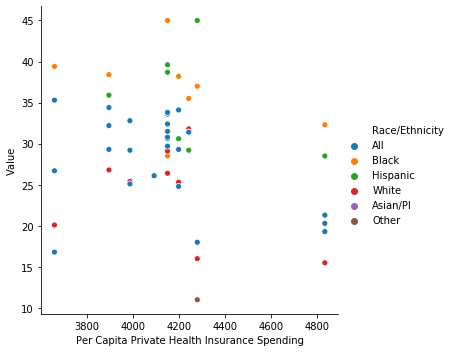

In [12]:
sns.relplot(x='Per Capita Private Health Insurance Spending', y='Value', hue=hue, data=adults_obese.loc[adults_obese['Year']=="Year 2010"])

#### Per Capita Private Health Insurance Spending 2011 (by Race/Ethnicity)

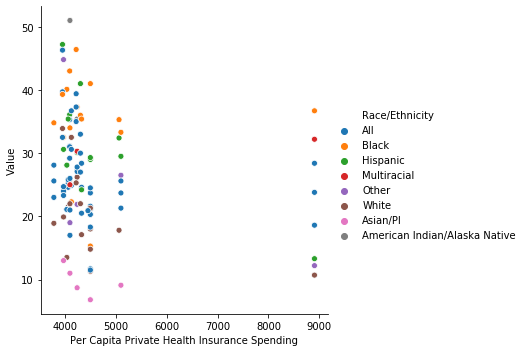

In [13]:
sns.relplot(x='Per Capita Private Health Insurance Spending', y='Value', hue=hue, data=adults_obese.loc[adults_obese['Year']=="Year 2011"])

#### Per Capita Private Health Insurance Spending 2012 (by Race/Ethnicity)

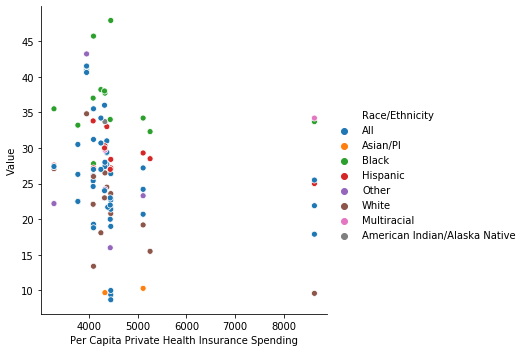

In [14]:
sns.relplot(x='Per Capita Private Health Insurance Spending', y='Value', hue=hue, data=adults_obese.loc[adults_obese['Year']=="Year 2012"])

#### Per Capita Private Health Insurance Spending 2013 (by Race/Ethnicity)

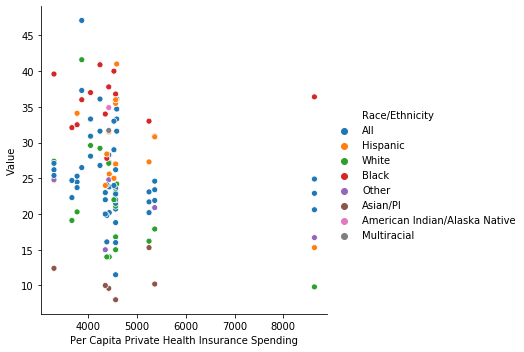

In [15]:
sns.relplot(x='Per Capita Private Health Insurance Spending', y='Value', hue=hue, data=adults_obese.loc[adults_obese['Year']=="Year 2013"])

#### Per Capita Private Health Insurance Spending 2014 (by Race/Ethnicity)

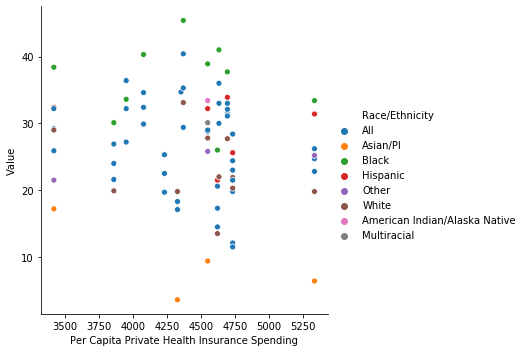

In [16]:
sns.relplot(x='Per Capita Private Health Insurance Spending', y='Value', hue=hue, data=adults_obese.loc[adults_obese['Year']=="Year 2014"])

It doesn't seem like there is that much of a relationship here. Lets create some models and see how well they work.

**Adults:**

In [17]:
# drop NA rows so we can run model
data = adults_obese[['Per Capita Private Health Insurance Spending', 'Value', 'Year']].dropna() 
y = data['Value']
X = data[['Per Capita Private Health Insurance Spending']]

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [22]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
cross_validate(LinearRegression(), X, y, cv=ShuffleSplit(n_splits=200))['test_score'].mean()

0.008635039804941437

In [23]:
cross_validate(DecisionTreeRegressor(), X, y, cv=ShuffleSplit(n_splits=200))['test_score'].mean()

0.10101935525993681

In [25]:
import draw_tree
draw_tree.save(DecisionTreeRegressor(max_depth=5).fit(X,y), X, y, 'tree_adults')

Image is saved to tree_adults.png


**High School Students:**

In [26]:
students_obese = bchi.loc[bchi['Indicator'] == 'Percent of High School Students Who Are Obese']
data = students_obese[['Per Capita Private Health Insurance Spending', 'Value', 'Year']].dropna() 
y = data['Value']
X = data[['Per Capita Private Health Insurance Spending']]

In [27]:
cross_validate(LinearRegression(), X, y, cv=ShuffleSplit(n_splits=200))['test_score'].mean()

-0.08363212693046894

In [28]:
cross_validate(DecisionTreeRegressor(), X, y, cv=ShuffleSplit(n_splits=200))['test_score'].mean()

0.2934097449147224

In [29]:
draw_tree.save(DecisionTreeRegressor(max_depth=5).fit(X,y), X, y, 'tree_students')

Image is saved to tree_students.png


**Conclusion:** While it does not seem that the cost of healthcare is major factor in obesity rates, it does seem to have some small effect.  

### IV. Project Report

The report should be in stages. You should turn in notebooks with properly named. For example, COMP4151_Project_Team01_StageI.ipynb.